In [1]:
from __future__ import division
import numpy as np
import os,sys
import pickle

from IPython.display import display, Image
from matplotlib import pyplot as plt

import Tools

from DataGenerator import genTrainValidFolds

%matplotlib inline

In [2]:
"""
    Disadvantage with k-nearest nrighbor.
    1. The classifier has to store all the training records in the memory which is space inefficient
    2. The classifier has to iteratively compare test data to all of the training data.
    3. The nearest neighbor algorithm can not model the complexities in the image like edges, shapes. The classsifer
    even performs bad under different intensities of light. ... and many more
"""

class KNN():
    def __init__(self):
        pass
    
    def train(self,x, y):
        self.trainX = x
        self.trainY = y
        
    def similarity(self, k, validX, distanceMeasure):
        '''
            Here we use different similarity measure to see that the cross validation data 
            is closest to which image. The training set that has minimum distance with the 
            cross validation dataset is the closest prediction
        '''
        if distanceMeasure == 'L1':
            distance = np.sum(np.abs(self.trainX - validX), axis = 1)
            kNearest_indices = distance.argsort()[:k]
            return kNearest_indices
        if distanceMeasure == 'L2':
            distance = np.sqrt(np.sum(np.square(self.trainX - validX), axis=1))
            kNearest_indices = distance.argsort()[:k]
            return kNearest_indices
    
    def predict(self, k, validX, numValidation, distanceMeasure='L1'):
        predY = np.zeros(shape=(numValidation, self.trainY.shape[1]), dtype=self.trainY.dtype)
        predY_data =  np.zeros(shape=(numValidation), dtype=int)
        for vrow in range(numValidation):
            kNearest_indices = self.similarity(k, validX[vrow,:], distanceMeasure)
            kNearestNeighbor = self.trainY[kNearest_indices]
            # Taking the most frequent nearest neighbor, 
            # The below code will just convert [[1,0,0,0],[0,1,0,0,0],[1,0,0,0,0]] 
            # into [2,1,0,0,0] and then into [1,0,0,0,0] 
            sum_knn = sum(kNearestNeighbor) 
            nearestLabel = (sum_knn == sum_knn.max(axis=0,keepdims=True)).astype(int)
            nearestLabelIndice = [i for i,j in zip(kNearest_indices, nearestLabel) if j==1]

            predY[vrow] = nearestLabel
            predY_data[vrow] = nearestLabelIndice[0]

        print ('Ran for %d cross validation rows and now returning : '%numValidation)
        return predY, predY_data


    

In [3]:
def visualize(trainData, validData, nearestImageIndice, imageSize, limit_images=10):
    fig2, axs2 = plt.subplots(limit_images,2, figsize=(10,40), facecolor='w', edgecolor='k')

    axs2 = axs2.ravel()
    flag1 = 0
    flag2 = 1
    for true, nearest in zip(np.arange(limit_images), nearestImageIndice[0:limit_images]):
        nearestImage = trainData[nearest,:].reshape(imageSize,imageSize)
        trueImage = validData[true,:].reshape(imageSize,imageSize)
#         print (nearestImage)
#         print (trueImage)
        axs2[flag1].imshow(nearestImage)
        axs2[flag2].imshow(trueImage)
        flag1 = flag2+1
        flag2 = flag1+1
    

Running i is : 0
Validation Data and Labels shape:  (5000, 1024) (5000, 10)
Training Data and Labels shape:  (45000, 1024) (45000, 10)
Ran for 10 cross validation rows and now returning : 


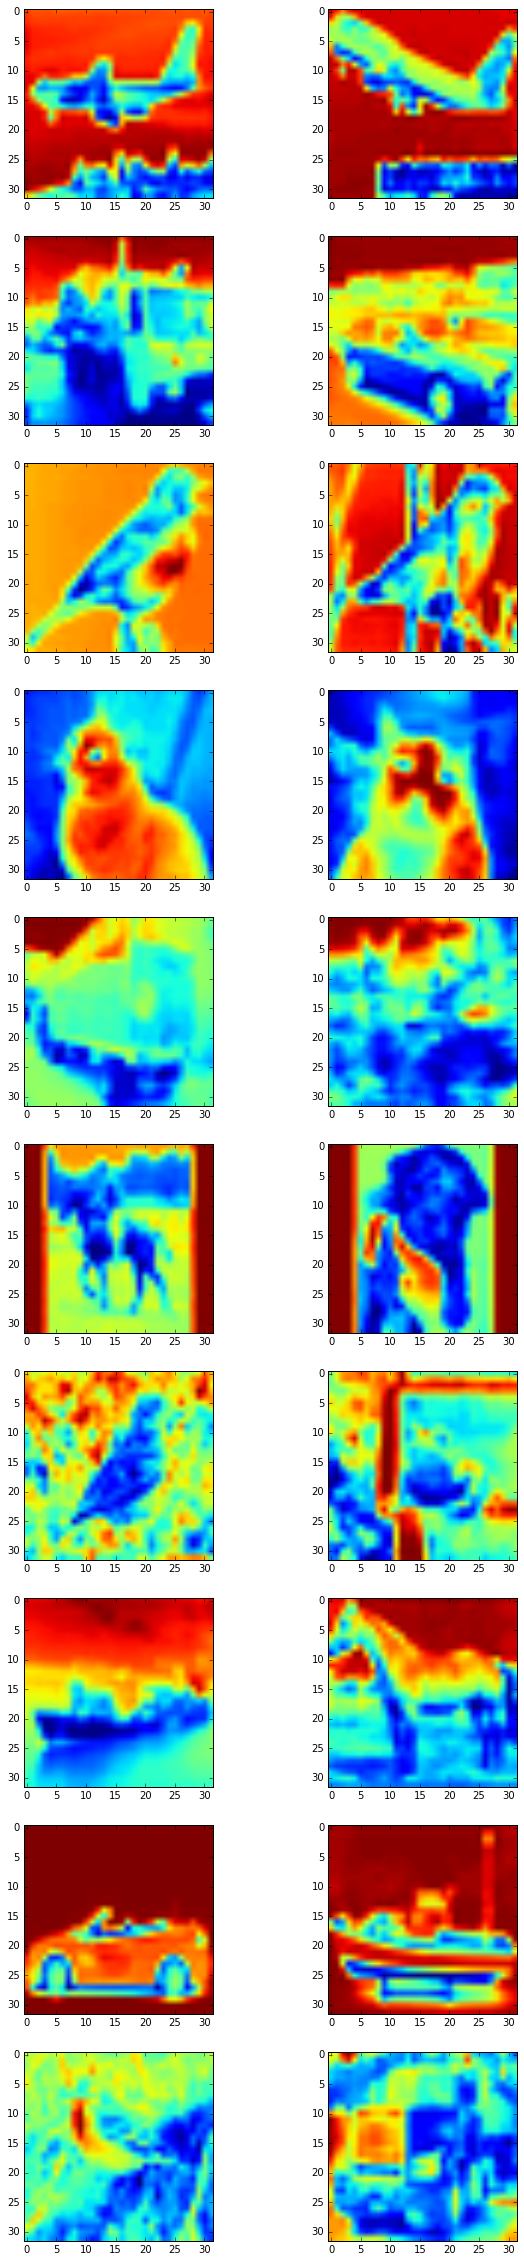

In [4]:
numNearestNeighbor = 20
numValidation = 10

def main():
    for trainData, trainLabels, validData, validLabels in genTrainValidFolds():
        print ('Validation Data and Labels shape: ', validData.shape, validLabels.shape)
        print ('Training Data and Labels shape: ', trainData.shape, trainLabels.shape)
        # create an object for the class KNN class
        obj_KNN = KNN()
        obj_KNN.train(trainData, trainLabels)
        
        predLabels, nearestImageIndice  = obj_KNN.predict(numNearestNeighbor, validData, numValidation, distanceMeasure='L1')
        visualize(trainData, validData, nearestImageIndice, imageSize=32, limit_images=10)
#         print ('The class prediciton array is \n', predLabels)
#         print ('The prediciton data indice is \n', nearestImageIndice)
#         print ('Actual class array is \n', trainLabels[0:numValidation,:])
        break
        
main()